<a href="https://colab.research.google.com/github/NMengo/Data-Science/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Missing data

1.   Omission. --> Removal of rows/columns
2.   Imputation. --> Fill with zero, impute mean, median, mode.

As a general rule of thumb:

*   Omission --> Can remove too much data
*   Zero --> Bias results downward.
*   Mean --> Affected by outliers.
*   Median --> Better in case of outliers.



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.model_selection import train_test_split
import scipy
from scipy import stats
from sklearn.impute import SimpleImputer#, IterativeImputer
from scipy.stats import boxcox
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LarsCV
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, ExtraTreesRegressor
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [ ]:
# General methods.
df.isna().sum()   # Sum missing values in df
df['feature'].mean() # Mean of feature
.shape          # row, column dimensions
df.columns      # column names
.fillna(0)      # fill missing values wiht 0
select_dtypes(include= [np.number])  # select only numeric columns
select_dtypes(include= ['object'])  # select only string columns

In [7]:
loan_data = pd.read_csv('loan_data.csv')
# 2 cool things to check: 
      # Percentage of rows and columns remain post droping.
      # Statistics when filling (e.g: how mean is affected if we replace with 0)

dropNArows = loan_data.dropna(axis=0)
dropNAcols = loan_data.dropna(axis=1)

print(dropNArows.shape[0]/loan_data.shape[0] * 100)
print(dropNAcols.shape[1]/loan_data.shape[1] * 100)

34.347092565515695
70.58823529411765


In [ ]:
# Fill missing values with zero
loan_data_filled = loan_data.fillna(0)

# Examine 'Credit Score' before
print(loan_data['Credit Score'].describe())

# Examine 'Credit Score' after
print(loan_data_filled['Credit Score'].describe())

count    67572.000000
mean       721.601951
std         27.427709
min        585.000000
25%        710.000000
50%        730.000000
75%        741.000000
max        751.000000
Name: Credit Score, dtype: float64
count    88910.000000
mean       548.420729
std        309.109970
min          0.000000
25%        632.000000
50%        719.000000
75%        739.000000
max        751.000000
Name: Credit Score, dtype: float64


In [ ]:
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Impute with mean
imp_mean = SimpleImputer(strategy='mean')
loans_imp_mean = imp_mean.fit_transform(numeric_cols)

# Convert returned array to DataFrame
loans_imp_meanDF = pd.DataFrame(loans_imp_mean, columns=numeric_cols.columns)

# Check the DataFrame's info
print(loans_imp_meanDF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

In [ ]:

# Another way of imputing. This is an experimental one!
# Subset numeric features: numeric_cols
numeric_cols = loan_data.select_dtypes(include=[np.number])

# Iteratively impute
imp_iter = IterativeImputer(max_iter=5, sample_posterior=True, random_state=123)
loans_imp_iter = imp_iter.fit_transform(numeric_cols)

# Data Distribution

We have to be careful of not introducing bias to our model when spliting train/test, by checking they do not have different distributions.

sns.pairplot() --> plot matrix of distributions and scatterplots

We need to transform data in a way that it resembles as much as possible to a normal distribution for our models to work better.  

We can apply Box-Cox Transformations, being log one of them.
scipy.stats.boxcox(data, lmbda=)

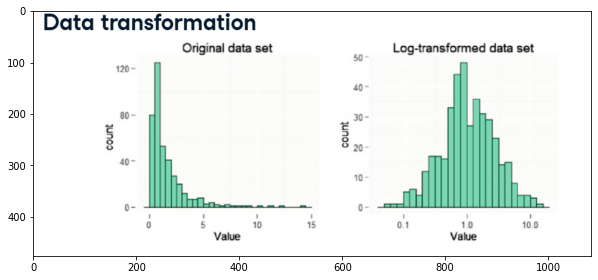

In [ ]:
# This is just an example
_ = plt.figure(figsize=(10,5))
img = mpimg.imread('data_trans.png')
imgplot = plt.imshow(img)

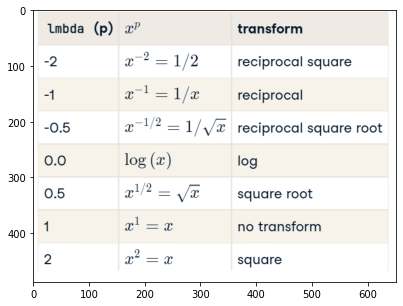

In [ ]:
_ = plt.figure(figsize=(10,5))
img = mpimg.imread('boxcox.png')
imgplot = plt.imshow(img)

In [ ]:
loan_data_subset = 0
trainingSet, testSet = 0, 0

<Figure size 1440x720 with 0 Axes>

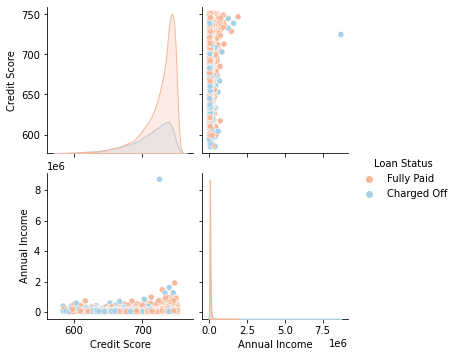

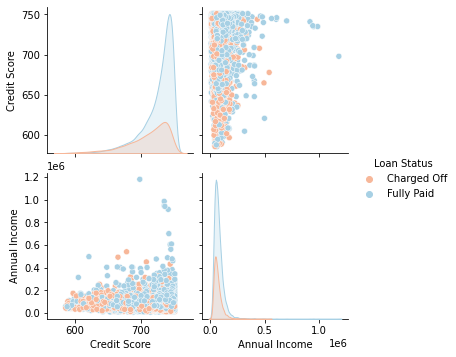

In [ ]:

_ = plt.figure(figsize=(20,10))
# Create `loan_data` subset: loan_data_subset
loan_data_subset = loan_data[['Credit Score','Annual Income','Loan Status']]

# Create train and test sets
trainingSet, testSet = train_test_split(loan_data_subset, test_size=0.2, random_state=123)

# Examine pairplots
# plt.figure()
sns.pairplot(trainingSet, hue='Loan Status', palette='RdBu')
plt.show()

# plt.figure()
sns.pairplot(testSet, hue='Loan Status', palette='RdBu')
plt.show()

trainingSet and testSet have different distributions when conditioned on the Loan Status target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


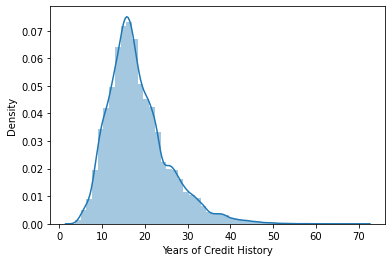

In [ ]:
# Subset loan_data
cr_yrs = loan_data['Years of Credit History']

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


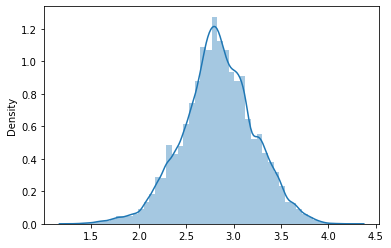

In [ ]:
# As we can see, data is skewed to the left.

# Box-Cox transformation
cr_yrs_log = boxcox(cr_yrs, lmbda=0.0)

# Histogram and kernel density estimate
plt.figure()
sns.distplot(cr_yrs_log)
plt.show()

# Data outliers and Scaling

Outliers are one or more observations that are distant from the rest of the observations in a given feature.

From a scientific POV, they are usually defined as those who are outside 1.5 IQR.

IQR --> Median - 50th percentile

Also, can be removed with Z-score, which gives a threshold for outliers approx +/- 3 std. dev away from the mean

Scaling helps model by reducing percepted variance, allowing it to properly assign importance to each feature.

* Standarization --> z-score standarization scales to mean 0 and std 1
* Normalization --> min/max normalization scales between 0 and 1

scikit-learn.preprocessing.StandardScaler()  
sklearn.preprocessing.MinMaxScaler()

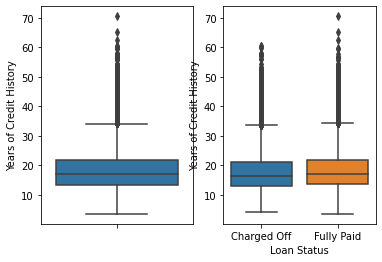

In [ ]:
# Univariate and multivariate boxplots
fig, ax =plt.subplots(1,2)
sns.boxplot(y=loan_data['Years of Credit History'], ax=ax[0])
sns.boxplot(x='Loan Status', y='Years of Credit History', data=loan_data, ax=ax[1])
plt.show()

In [ ]:
numeric_cols = loan_data.select_dtypes(include=[np.number])
categoric_cols = loan_data.select_dtypes(include=['object'])


# Iteratively impute
imp_iter = SimpleImputer(strategy='mean')
numeric_cols2 = imp_iter.fit_transform(numeric_cols)
numeric_cols = pd.DataFrame(numeric_cols2, columns=numeric_cols.columns)

numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88910 entries, 0 to 88909
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           88910 non-null  float64
 1   Credit Score                  88910 non-null  float64
 2   Years in current job          88910 non-null  float64
 3   Annual Income                 88910 non-null  float64
 4   Monthly Debt                  88910 non-null  float64
 5   Years of Credit History       88910 non-null  float64
 6   Months since last delinquent  88910 non-null  float64
 7   Number of Open Accounts       88910 non-null  float64
 8   Number of Credit Problems     88910 non-null  float64
 9   Current Credit Balance        88910 non-null  float64
 10  Maximum Open Credit           88910 non-null  float64
 11  Bankruptcies                  88910 non-null  float64
 12  Tax Liens                     88910 non-null  float64
dtypes

In [ ]:

zscores = abs(stats.zscore(numeric_cols))

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0.408982,0.267580,1.312259,0.505187,0.291304,0.044731,1.690476e+00,0.178701,0.338742,0.441228,0.097522,0.328558,0.109592
1,0.408617,0.476690,1.189261,0.172045,0.111388,1.189463,4.789240e-16,0.580434,0.338742,1.031104,0.168967,0.328558,0.109592
2,0.408871,0.100291,0.911314,0.234046,0.440641,0.229151,2.076194e-01,0.022165,1.772105,0.211660,0.071377,2.587512,0.109592
3,0.408997,0.769445,0.756366,0.750323,0.043666,1.179622,4.789240e-16,1.986499,0.338742,0.428664,0.037928,0.328558,0.109592
4,0.409052,1.488948,1.189261,0.498111,0.720592,0.229151,6.794373e-01,0.379568,1.772105,0.075136,0.053344,2.587512,0.109592
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,0.409042,0.267580,1.189261,0.724674,0.620344,0.409226,1.420866e+00,0.580434,0.338742,0.024318,0.020185,0.328558,0.109592
88906,0.408486,0.485218,1.189261,1.002978,2.424280,0.470315,1.286060e+00,0.022165,0.338742,0.116543,0.003053,0.328558,0.109592
88907,0.408635,1.020377,1.451233,0.023542,0.227290,2.565519,1.757878e+00,0.624764,0.338742,1.490037,0.075384,0.328558,0.109592
88908,0.409188,0.016647,1.451233,0.922245,0.945745,0.097131,1.892683e+00,0.178701,0.338742,0.460965,0.057649,0.328558,0.109592


In [ ]:
zscores_mask = (zscores < 3) # Boolean mask
zscores_mask

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88905,True,True,True,True,True,True,True,True,True,True,True,True,True
88906,True,True,True,True,True,True,True,True,True,True,True,True,True
88907,True,True,True,True,True,True,True,True,True,True,True,True,True
88908,True,True,True,True,True,True,True,True,True,True,True,True,True


In [ ]:
idx = zscores_mask.all(axis=1) # Which rows have all Trues in all columns?
idx

0         True
1         True
2         True
3         True
4         True
         ...  
88905     True
88906     True
88907     True
88908     True
88909    False
Length: 88910, dtype: bool

In [ ]:
ld_out_drop = pd.concat([numeric_cols.loc[idx], categoric_cols.loc[idx]], axis=1)
ld_out_drop

,Current Loan Amount,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan Status,Term,Home Ownership,Purpose
0,12232.0,728.0,1.0,46643.0,777.39,18.0,10.000000,12.0,0.0,6762.0,7946.0,0.0,0.0,Charged Off,Short Term,Rent,DebtConsolidation
1,25014.0,733.0,10.0,81099.0,892.09,26.7,35.080289,14.0,0.0,35706.0,77961.0,0.0,0.0,Charged Off,Long Term,Mortgage,DebtConsolidation
2,16117.0,724.0,9.0,60438.0,1244.02,16.7,32.000000,11.0,1.0,11275.0,14815.0,1.0,0.0,Charged Off,Short Term,Mortgage,HomeImprovements
3,11716.0,740.0,3.0,34171.0,990.94,10.0,35.080289,21.0,0.0,7009.0,43533.0,0.0,0.0,Charged Off,Short Term,Rent,DebtConsolidation
4,9789.0,686.0,10.0,47003.0,503.71,16.7,25.000000,13.0,1.0,16913.0,19553.0,1.0,0.0,Charged Off,Long Term,Mortgage,HomeImprovements
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88904,14840.0,730.0,1.0,47652.0,1238.95,23.2,35.080289,13.0,0.0,28731.0,42690.0,0.0,0.0,Fully Paid,Short Term,Rent,DebtConsolidation
88905,10136.0,728.0,10.0,35476.0,567.62,21.2,14.000000,14.0,0.0,15914.0,28265.0,0.0,0.0,Fully Paid,Short Term,Rent,DebtConsolidation
88906,29610.0,710.0,10.0,123375.0,2508.63,15.0,16.000000,11.0,0.0,17727.0,32766.0,0.0,0.0,Fully Paid,Short Term,Mortgage,DebtConsolidation
88907,24394.0,746.0,0.5,71148.0,818.20,36.4,9.000000,8.0,0.0,44728.0,53374.0,0.0,0.0,Fully Paid,Short Term,Mortgage,DebtConsolidation


In [ ]:
# Print: before winsorize
print((numeric_cols['Monthly Debt']).mean())
print((numeric_cols['Monthly Debt']).median())
print((numeric_cols['Monthly Debt']).max())

963.1020592734226
843.925
22939.12


In [ ]:
print((ld_out_drop['Monthly Debt']).mean())
print((ld_out_drop['Monthly Debt']).median())
print((ld_out_drop['Monthly Debt']).max())

909.6759054742204
824.19
2875.31


If you take the trimmed distribution, you explicitly state: I am not interested in outliers/ the tails of the distribution. If you believe that the "outliers" are really outliers (i.e., they do not belong to the distribution, but are of "another kind") then do trimming. If you think they belong to the distribution, but you want to have a less skewed distribution, you could think about winsorising.

In [ ]:
from scipy import stats
# Winsorize numeric columns
debt_win = stats.mstats.winsorize(numeric_cols['Monthly Debt'], limits=[0.05, 0.05])

# Convert to DataFrame, reassign column name
debt_out = pd.DataFrame(debt_win, columns=['Monthly Debt'])

# Print: after winsorize
print(debt_out.mean())
print(debt_out.median())
print(debt_out.max())


Monthly Debt    935.371257
dtype: float64
Monthly Debt    843.925
dtype: float64
Monthly Debt    2115.52
dtype: float64


In [ ]:
# Find median
median = loan_data.loc[loan_data['Monthly Debt'] < 2120, 'Monthly Debt'].median()
loan_data['Monthly Debt'] = np.where(loan_data['Monthly Debt'] > 2120, median, loan_data['Monthly Debt'])

print((loan_data['Monthly Debt']).mean())
print((loan_data['Monthly Debt']).median())
print((loan_data['Monthly Debt']).max())

866.8290722078505
811.51
2119.72


the median didn't change when you dropped or winsorized, but it did when you replaced outliers with the median in the last step. This is because only the right tail outliers got replaced causing the median to shift!

# Feature Selection

Removing features that generates noice but no real useful information, reduces overfitting.

Also, improves accuracy.

Reduces training time.

**Feature Selection methods: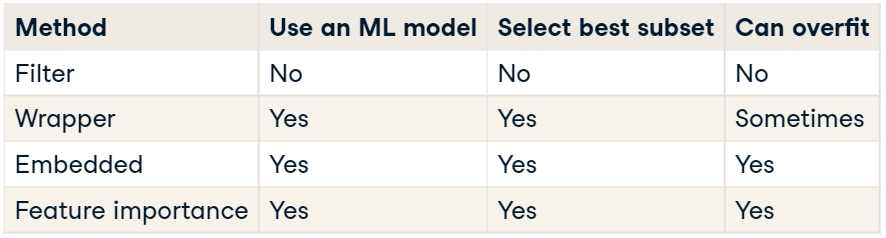**

Filter: rank features based on statistical performance  
Wrapper: using an ML method to evaluate performance  
Embedded: Iterative model training to extract features  
Feature importance: tree-based ML models  

**Filter**  
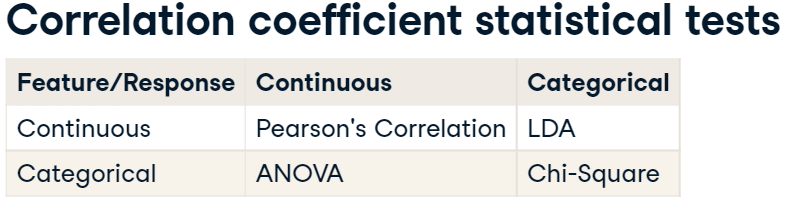

**Wrapper**  
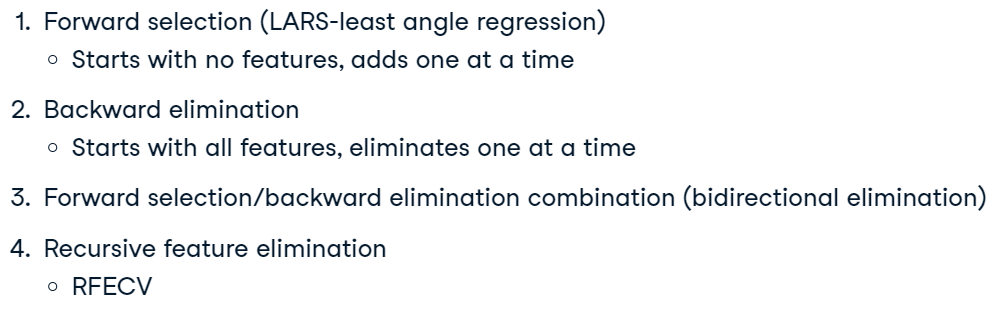

**Embedded**
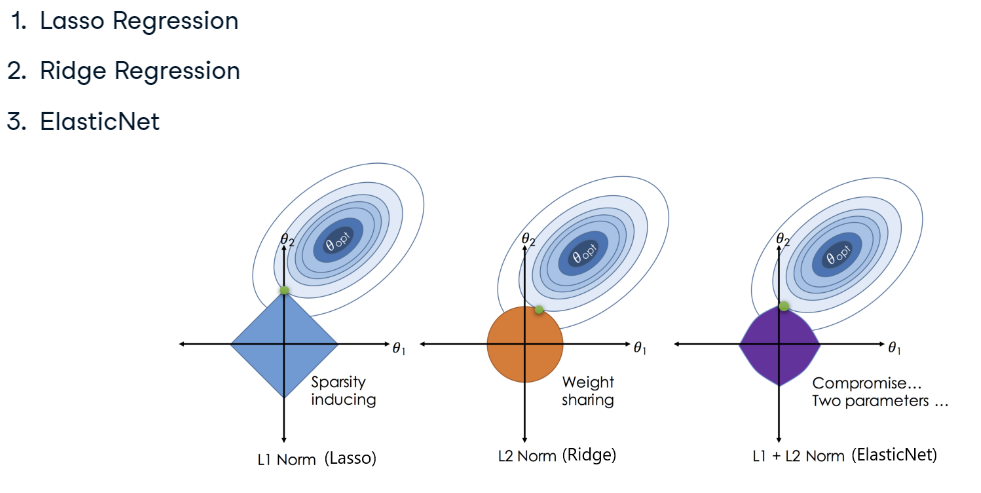

**Feature Imp**  
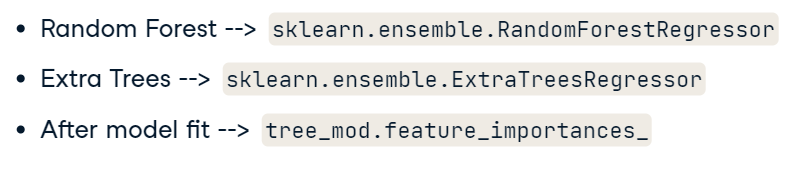

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

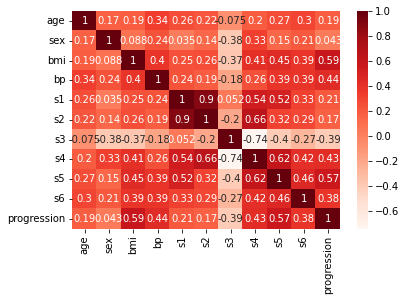

bmi            0.586450
s5             0.565883
progression    1.000000
Name: progression, dtype: float64


In [3]:
# FILTER METHOD #1
diabetes = pd.read_csv('diabetes.csv')
# Create correlation matrix and print it
cor = diabetes.corr()
print(cor)

# Correlation matrix heatmap
plt.figure()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Correlation with output variable
cor_target = abs(cor["progression"])

# Selecting highly correlated features
best_features = cor_target[cor_target > 0.5]
print(best_features)

In [ ]:
X = diabetes.iloc[:,:-1]
y = diabetes['progression']


In [ ]:
# WRAPPER METHOD #1
# Instantiate estimator and feature selector
svr_mod = SVR(kernel="linear")
feat_selector = RFECV(svr_mod, cv=5)

# Fit
feat_selector = feat_selector.fit(X, y)

# Print support and ranking
print(feat_selector.support_)
print(feat_selector.ranking_)
print(X.columns)

[ True False  True  True  True  True  True  True  True  True]
[1 2 1 1 1 1 1 1 1 1]
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [ ]:
# Drop feature suggested not important in step 2
X = X.drop('sex', axis=1)

# Instantiate
lars_mod = LarsCV(cv=5, normalize=False)

# Fit
feat_selector = lars_mod.fit(X, y)

# Print r-squared score and estimated alpha
print(lars_mod.score(X, y))
print(lars_mod.alpha_)

0.4982900996498095
0.052268622851592575


While filter and wrapper methods work pretty well for feature selection, tree-based selection methods can be even better.

In [ ]:
# Feature selection
# Instantiate
rf_mod = RandomForestRegressor(max_depth=2, random_state=123, 
              n_estimators=100, oob_score=True)

# Fit
rf_mod.fit(X, y)

# Print
print(diabetes.columns)
print(rf_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.         0.39961579 0.03085607 0.         0.00128948 0.00700339
 0.00417891 0.53899467 0.01806168]


In [ ]:
# Instantiate
xt_mod = ExtraTreesRegressor(n_estimators=50)

# Fit
xt_mod.fit(X, y)

# Print
print(diabetes.columns)
print(xt_mod.feature_importances_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'progression'],
      dtype='object')
[0.05977951 0.26973927 0.1118782  0.05016015 0.0554053  0.07590884
 0.0782186  0.21559152 0.0833186 ]


Ridge, Lasso and Elastic Net are regularization methods that reduce model complexity, and thus reducing overfitting, by adding a penalty term to the optimization method.  
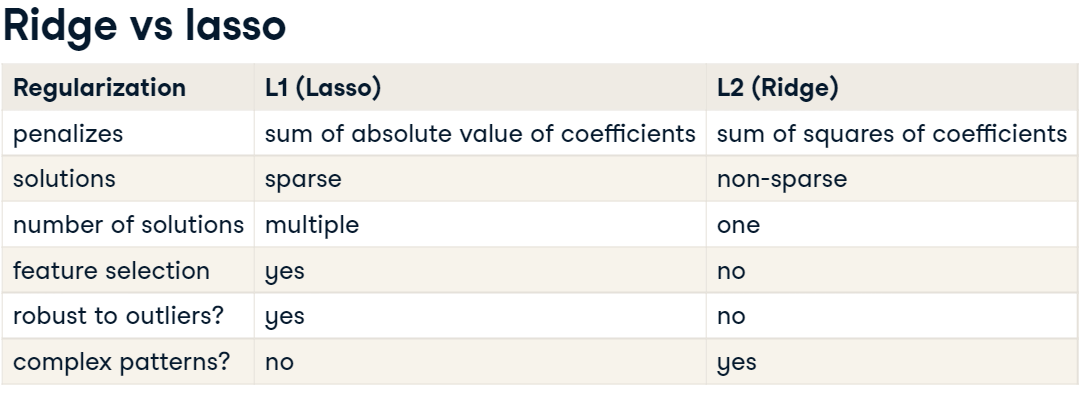

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated lasso, fit
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train, y_train)

# Instantiate lasso, fit, predict and print MSE
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=lasso.predict(X_test)))

2977.4320945626737


In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.3)

# Instantiate cross-validated ridge, fit
ridge_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
ridge_cv.fit(X_train, y_train)

# Instantiate ridge, fit, predict and print MSE
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)
print(mean_squared_error(y_true=y_test, y_pred=ridge.predict(X_test)))

3037.3833325134415


# Feature Engineering

1. Extracting additional information from data
2. Creating additional relevant new features


    1. Indicator variables (threshold, multiple features)
    2. Interaction features (math operations)
    3. Feature representation (grouping small categoricals in "other", extracting "days of a week" or "hour of day" from timestamp, OneHotEncoding)

One Caviat is eg: when you have trained certain categories that then they are not present in test set.

In [ ]:
# Create X matrix and y array
X = loan_data.drop("Loan Status", axis=1)
y = loan_data["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic = LogisticRegression()

# Fit
logistic.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic.predict(X_test)))

In [ ]:
# Convert income: monthly_income
monthly_income = loan_data["Annual Income"]/12

# Make engineered feature, remove features used !!!!!!!!!!!!!!!!!!!!!
loan_data["dti_ratio"] = loan_data["Monthly Debt"]/monthly_income * 100
loan_data = loan_data.drop(["Monthly Debt","Annual Income"], axis=1)

In [ ]:
# Create X matrix and y array
X = loans_dti.drop("Loan Status", axis=1)
y = loans_dti["Loan Status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Instantiate
logistic_dti = LogisticRegression()

# Fit
logistic_dti.fit(X_train, y_train)

# Predict and print accuracy
print(accuracy_score(y_true=y_test, y_pred=logistic_dti.predict(X_test)))

# Accuracy taken from 71% to 72% with Feature Engineering

# Enemble Learning Techniques

1. Boostrap Aggregation
2. Boosting
3. Model Stacking

**Bias** is the innability for a ML model to capture the true relationship:
Low complexity models  
* High bias
* Underfitting
* Poor generalization
* Bias decreases as complexity increases

**Variance**
High complexity models produces high sensitivity to small changes in data.
* High variance
* Overfitting
* Poor generalization

**Bias-Variance Trade-Off**  
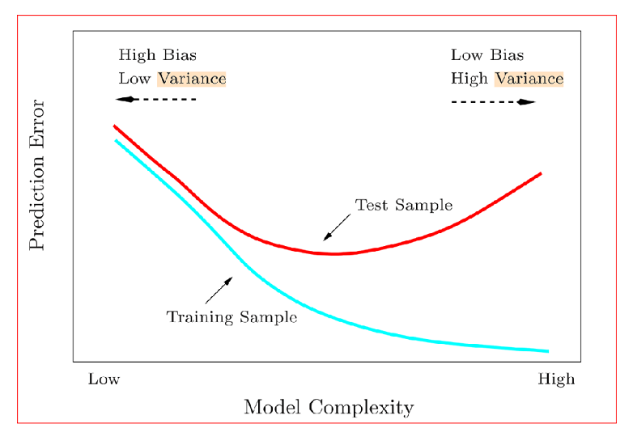

# Bagging (Bootstrap aggregation) 
**We've seen it before in EDA**

1. Bootstraped samples are generated with replacement
2. Model built for each sample
3. Average the output of all of them
4. **--> decreases variance**

This reduces variance and produces a more accurate model.  



# Boosting

1. Multiple models built sequentially
2. Incorrect predictions are weighted
3. **--> reduced bias**  

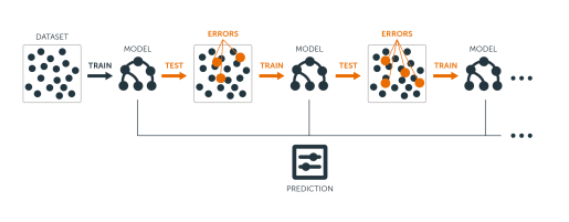

# Model Stacking

**There are like 2 layers of models**  

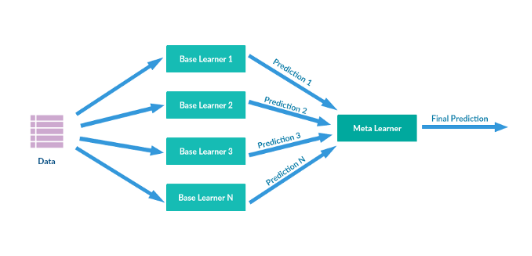

In [ ]:
# Bagged models decrease model variance, so this model should generalize nicely!
# Instantiate bootstrap aggregation model
bagged_model = BaggingClassifier(n_estimators=50, random_state=123)

# Fit
bagged_model.fit(X_train, y_train)

# Predict
bagged_pred = bagged_model.predict(X_test)

# Print accuracy score
print(accuracy_score(y_test, bagged_pred))

In [ ]:
# Boosting model
boosted_model = AdaBoostClassifier(n_estimators=50, random_state=123)

# Fit
boosted_model_fit = boosted_model.fit(X_train, y_train)

# Predict
boosted_pred = boosted_model_fit.predict(X_test)

# Print model accuracy
print(accuracy_score(y_test, boosted_pred))

# The boosted model did slightly better than the bagged model, but let's see what happens when we stack them. Onward!

In [ ]:
# Instantiate
xgb = XGBClassifier(random_state=123, learning_rate=0.1, n_estimators=10, max_depth=3)

# Fit
xgb = xgb.fit(X_train, y_train)

# Predict
xgb_pred = xgb.predict(X_test)

# Print accuracy score
print('Final prediction score: [%.8f]' % accuracy_score(y_test, xgb_pred))

# The AdaBoost Classifier did slightly better than XGBoost with this dataset. But that's not always the case, so make sure to try both!

# Unsupervised Learning

1. Principal Componen Analysis (PCA)
2. Singular Value Decomposition (SVD)
3. Clustering
4. Exploratory Data Mining.

Curse of dimensionality: model performance decreases as amount of features increases.  
In a high dimensionality context the feature space becomes more sparse and this ends up with overfitting.  
For that, we have dimensionality reduction methods such as 1 and 2.

**Why dimensionality reduction?**

* Speeds up ML training
* Visualization
* Improves accuracy

In [4]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# PCA
pca = PCA(n_components=3)

# Fit and transform
principalComponents = pca.fit_transform(X)

# Print ratio of variance explained
print(pca.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


In [6]:
# Feature matrix and target array
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']

# SVD
svd = TruncatedSVD(n_components=3)

# Fit and transform
principalComponents = svd.fit_transform(X)

# Print ratio of variance explained
print(svd.explained_variance_ratio_)

[0.40242142 0.14923182 0.12059623]


 It looks like they both perform exactly the same with this dataset! But you never know so trying both is a good idea. Whenever you're given high dimensional data, you know what to do!

In [13]:
list(range(2,6))

[2, 3, 4, 5]